# Day 1 Eindopdracht “Statistics for Data Science”

Voor deze eindopdracht zijn er twee mogelijkheden. Hieronder volgt ten eerste de
beschrijving van een opdracht gebaseerd op een dataset over universiteiten in de Verenigde
Staten. Het is ook mogelijk om de eindopdracht te baseren op een eigen (bedrijfs)dataset.
Aan het einde van dit document volgt meer informatie hierover.

Voor beide opdrachten geldt dat de resultaten in drie delen ingeleverd moeten worden,
telkens samengevat in een bondig rapport. In dit rapport moet voor elke deelanalyse dui-
delijk zijn wat het doel van de berekening is, wat de uitkomst is en vooral wat de conclusie
is.

Zorg ervoor dat er voldoende details gegeven zijn, bijvoorbeeld bij het uitvoeren van
een statistische toets is het van belang om:
1. de keuze van de toets duidelijk te motiveren;
2. de nul- en alternatieve hypothese te beschrijven;
3. de p-waarde te rapporteren;
4. de uiteindelijke conclusie te rapporteren in termen van de toepassing (dus niet alleen
“de nul-hypothese wordt verworpen”, maar ook wat dit dan betekent).


Voor elk deel van de opdracht moet een rapport in pdf formaat ingeleverd worden, sa-
men met de volledige Python (of R) code in een apart bestand. Het inleveren verloopt via
Canvas (zie onder “Assignments”). Het verwerken van de resultaten met behulp van bij-
voorbeeld een Jupyter Notebook of R-Markdown is prima, maar probeer onnodige output
te vermijden en lever ook altijd een pdf versie in.
De deadlines zijn als volgt:
Deel 1: zondag, 28 september (voor het einde van de dag);
Deel 2: zondag, 12 oktober (voor het einde van de dag);
Deel 3: zondag, 26 oktober (voor het einde van de dag).



## 1 Opdracht obv. universiteitsdata
Het databestand college statistics.csv bevat informatie over 777 universiteiten en
colleges in de Verenigde Staten in ´e´en specifiek jaar.

De variabelen in deze dataset zijn:

- Privé (Private): Indicator voor publiek/persoonlijk
- Aanvragen (Apps): Aantal ontvangen aanvragen
- Acceptatie (Accept): Aantal toegelaten aanvragers
- Inschrijving (Enroll): Aantal nieuwe ingeschreven studenten
- Top10perc: Percentage nieuwe studenten die in de top 10% van hun middelbare schoolklasse zaten
- Top25perc: Percentage nieuwe studenten die in de top 25% van hun middelbare schoolklasse zaten
- F.Undergrad: Aantal voltijd bachelorstudenten
- P.Undergrad: Aantal deeltijd bachelorstudenten
- Outstate: Collegegeld voor studenten van buiten de staat
- Kamer en Board (Room.Board): Kosten voor kamer en maaltijden
- Boeken (Books): Geschatte kosten voor boeken
- Persoonlijk (Personal): Geschatte persoonlijke uitgaven
- PhD: Percentage faculteit met een Ph.D.
- Terminale graad (Terminal): Percentage faculteit met een terminale graad
- S.F.Ratio: Studenten/faculteit ratio
- Perc.alumni: Percentage alumni die doneren
- Uitgaven (Expend): Onderwijsexpenditures per student
- Afstudeerpercentage (Grad.Rate): Afstudeerpercentage

In deze opdracht voer je een gedetailleerde statistische analyse uit op deze dataset.
Hieronder vind je een lijst van stappen die uitgevoerd moeten worden.

In [1]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Deel 1

# Lees de data in als dataframe.
inlezen csv-file

In [2]:
DATA_PATH = "/Users/adilvural/Documents/GitHub/myPython/Opdracht_StatisticsforDataScience/college_statistics.csv"

In [3]:
# lees de dataset in een pandas DataFrame
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

#print (df.info())
#Deze functie geeft een samenvatting van het DataFrame, inclusief het aantal niet-lege (non-null) waarden per kolom, het datatype van elke kolom en de geheugengrootte. 
#Het is handig om een overzicht te krijgen van de structuur van de data en om te controleren op ontbrekende waarden.

#print (df.head())
#Dit toont de eerste n rijen van het DataFrame (standaard zijn het de eerste 5 rijen als je geen argument opgeeft). 
#Het is nuttig om snel een blik te werpen op een subset van de gegevens en om te controleren of de data correct is ingelezen.


#print (df.describe())
#Deze functie geeft een statistische samenvatting van de numerieke kolommen in het DataFrame. 
#Het omvat statistieken zoals het aantal waarden, het gemiddelde, de standaardafwijking, de minimum- en maximumwaarden, en de kwartielen. 
#Dit is handig om een idee te krijgen van de distributie van de numerieke gegevens.

print (df.columns)
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.


print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')
(777, 19)


# 2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (a) Zijn private universiteiten overwegend kleiner of groter dan publieke universiteiten? Je mag zelf een definitie voor groot/klein definieeren.

In [ ]:
# Om universiteiten objectief in te delen, wordt een kolom 'Size' toegevoegd, gebaseerd op 'Enroll' (het aantal nieuwe ingeschreven studenten), 
# wat de capaciteit en aantrekkingskracht van de instelling weergeeft. De mediaan van 'Enroll' wordt gebruikt als drempel, 
# omdat deze minder gevoelig is voor uitschieters en zo een eerlijkere scheiding tussen 'Groot' en 'Klein' garandeert.

df['Size'] = df['Enroll'].apply(lambda x: 'Groot' if x > df['Enroll'].median() else 'Klein')
print (df['Size'].value_counts())
result = df[['Size', 'Enroll']]
print(result)


Size
Klein    389
Groot    388
Name: count, dtype: int64
      Size  Enroll
0    Groot     721
1    Groot     512
2    Klein     336
3    Klein     137
4    Klein      55
..     ...     ...
772  Groot     543
773  Groot     695
774  Groot     695
775  Groot    1317
776  Groot     691

[777 rows x 2 columns]


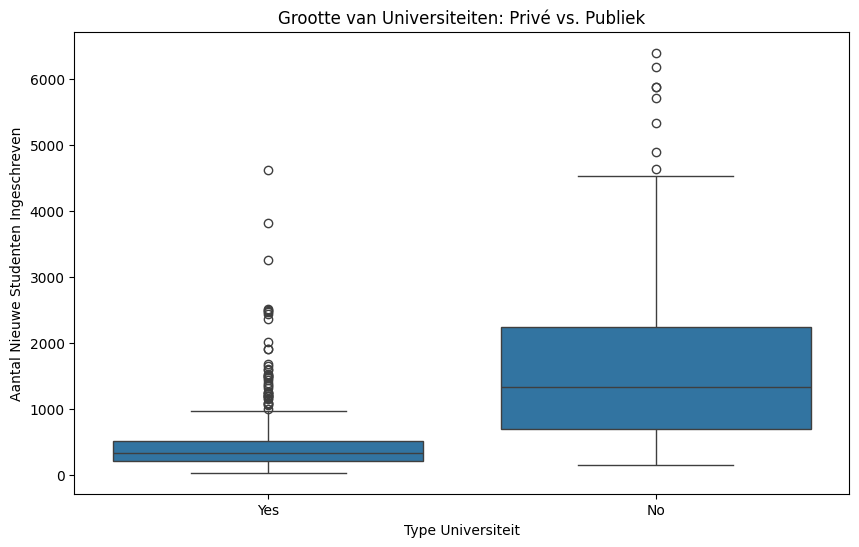

In [9]:
# Een boxplot om de grootte van private versus publieke universiteiten te vergelijken
plt.figure(figsize=(10, 6))
sns.boxplot(x='Private', y='Enroll', data=df)
plt.title('Grootte van Universiteiten: Privé vs. Publiek')
plt.ylabel('Aantal Nieuwe Studenten Ingeschreven')
plt.xlabel('Type Universiteit')
plt.show()

2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (b) Zijn de meer selectieve universiteiten ook overwegend duurder dan minder selectieve universiteiten? (Je mag zelf bepalen welke kosten je wel/niet mee neemt.)

In [4]:
# 2b 1 Verwerk ontbrekende waarden in numerieke kolommen met het gemiddelde
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numerieke kolommen:", numeric_columns)
for col in numeric_columns:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Ontbrekende waarden in kolom '{col}' vervangen door het gemiddelde: {mean_value}")  

#Data controleer of er nog steeds ontbrekende waarden zijn
#print("Aantal ontbrekende waarden per kolom na verwerking:")


Numerieke kolommen: Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad',
       'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend', 'Grad_Rate'],
      dtype='object')


In [48]:
#2b 2 Herken de kolommen met de selectiviteit
selectiviteit_kolom = 'Accept'  # Aantal geaccepteerde studenten
totaal_aanvragen_kolom = 'Apps'  # Totaal aantal aanvragen
# Bereken de acceptatiegraad en behandel deling door nul
df['Acceptance Rate'] = df.apply(lambda row: row[selectiviteit_kolom] / row[totaal_aanvragen_kolom]
                                   if row[totaal_aanvragen_kolom] != 0 else 0, axis=1)
print(df[['Acceptance Rate', selectiviteit_kolom, totaal_aanvragen_kolom]].head(10))  # Print de eerste 10 rijen van de nieuwe kolom
print("Gemiddelde Acceptatiegraad:", df['Acceptance Rate'].mean())


   Acceptance Rate  Accept  Apps
0         0.742169    1232  1660
1         0.880146    1924  2186
2         0.768207    1097  1428
3         0.836930     349   417
4         0.756477     146   193
5         0.816014     479   587
6         0.963173     340   353
7         0.905740    1720  1899
8         0.808285     839  1038
9         0.855670     498   582
Gemiddelde Acceptatiegraad: 0.7469277072775414


In [49]:
#2b 3 Categorieën van selectiviteit opstellen
def categorize_selectivity(row):
    if row['Acceptance Rate'] < 0.25:
        return 'Zeer Selectief'
    elif row['Acceptance Rate'] < 0.50:
        return 'Selectief'
    else:
        return 'Minder Selectief'
df['Selectivity_Category'] = df.apply(categorize_selectivity, axis=1)
print(df[['Acceptance Rate', 'Selectivity_Category']].head(10))  # Print de eerste 10 rijen van de nieuwe kolom 

   Acceptance Rate Selectivity_Category
0         0.742169     Minder Selectief
1         0.880146     Minder Selectief
2         0.768207     Minder Selectief
3         0.836930     Minder Selectief
4         0.756477     Minder Selectief
5         0.816014     Minder Selectief
6         0.963173     Minder Selectief
7         0.905740     Minder Selectief
8         0.808285     Minder Selectief
9         0.855670     Minder Selectief


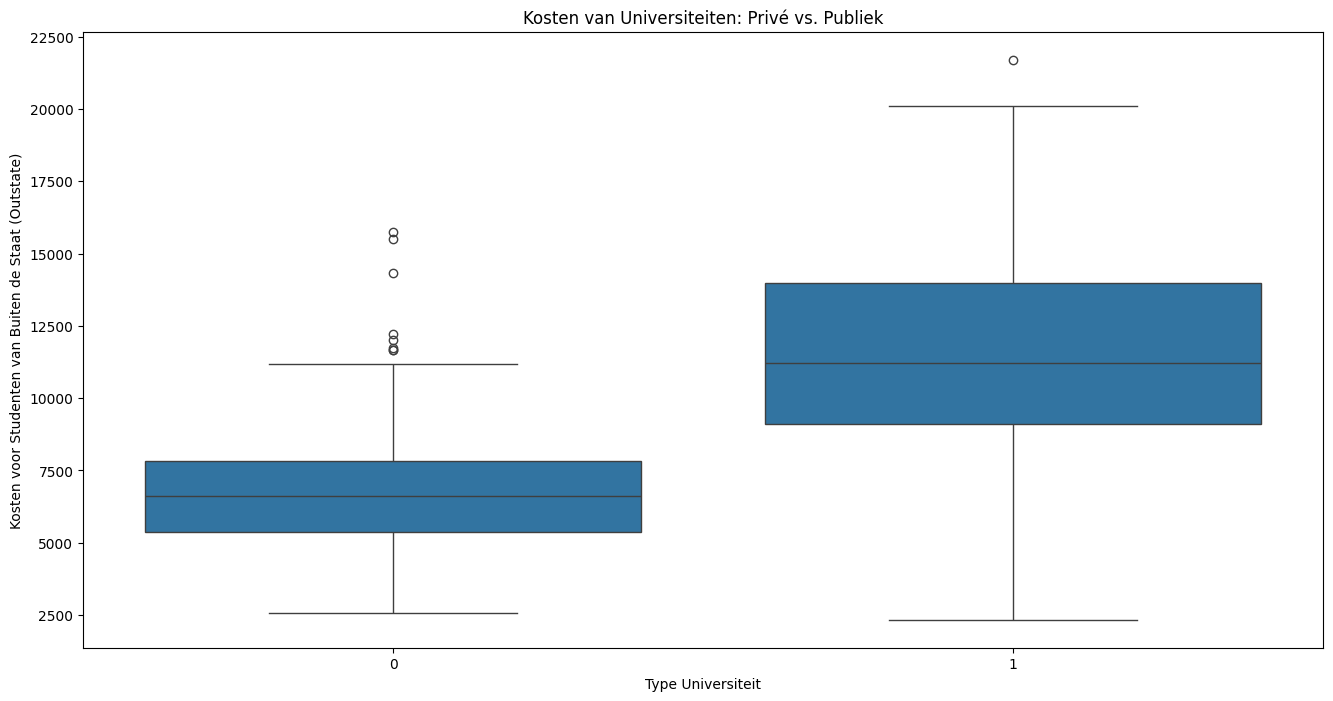

In [50]:
#2b 4 Een boxplot om de kosten van private versus publieke universiteiten te vergelijken
plt.figure(figsize=(16, 8))
sns.boxplot(x='Private', y='Outstate', data=df)
plt.title('Kosten van Universiteiten: Privé vs. Publiek')
plt.ylabel('Kosten voor Studenten van Buiten de Staat (Outstate)')
plt.xlabel('Type Universiteit')
plt.show()

In [51]:
#2b 5 Bereken totale kosten
df['Total_Cost'] = df['Outstate'] + df['Room_Board']
print(df[['Selectivity_Category','Outstate', 'Room_Board', 'Total_Cost']])  # Print de eerste 10 rijen van de nieuwe kolom


    Selectivity_Category  Outstate  Room_Board  Total_Cost
0       Minder Selectief      7440        3300       10740
1       Minder Selectief     12280        6450       18730
2       Minder Selectief     11250        3750       15000
3       Minder Selectief     12960        5450       18410
4       Minder Selectief      7560        4120       11680
..                   ...       ...         ...         ...
772     Minder Selectief      6797        3900       10697
773     Minder Selectief     11520        4960       16480
774     Minder Selectief      6900        4200       11100
775       Zeer Selectief     19840        6510       26350
776     Minder Selectief      4990        3560        8550

[777 rows x 4 columns]


In [40]:
#2b 6 Gemiddelde kosten per categorie
mean_costs = df.groupby('Selectivity_Category')['Total_Cost'].mean().reset_index()
print(mean_costs)

  Selectivity_Category    Total_Cost
0     Minder Selectief  14527.753825
1            Selectief  17604.222222
2       Zeer Selectief  25528.750000


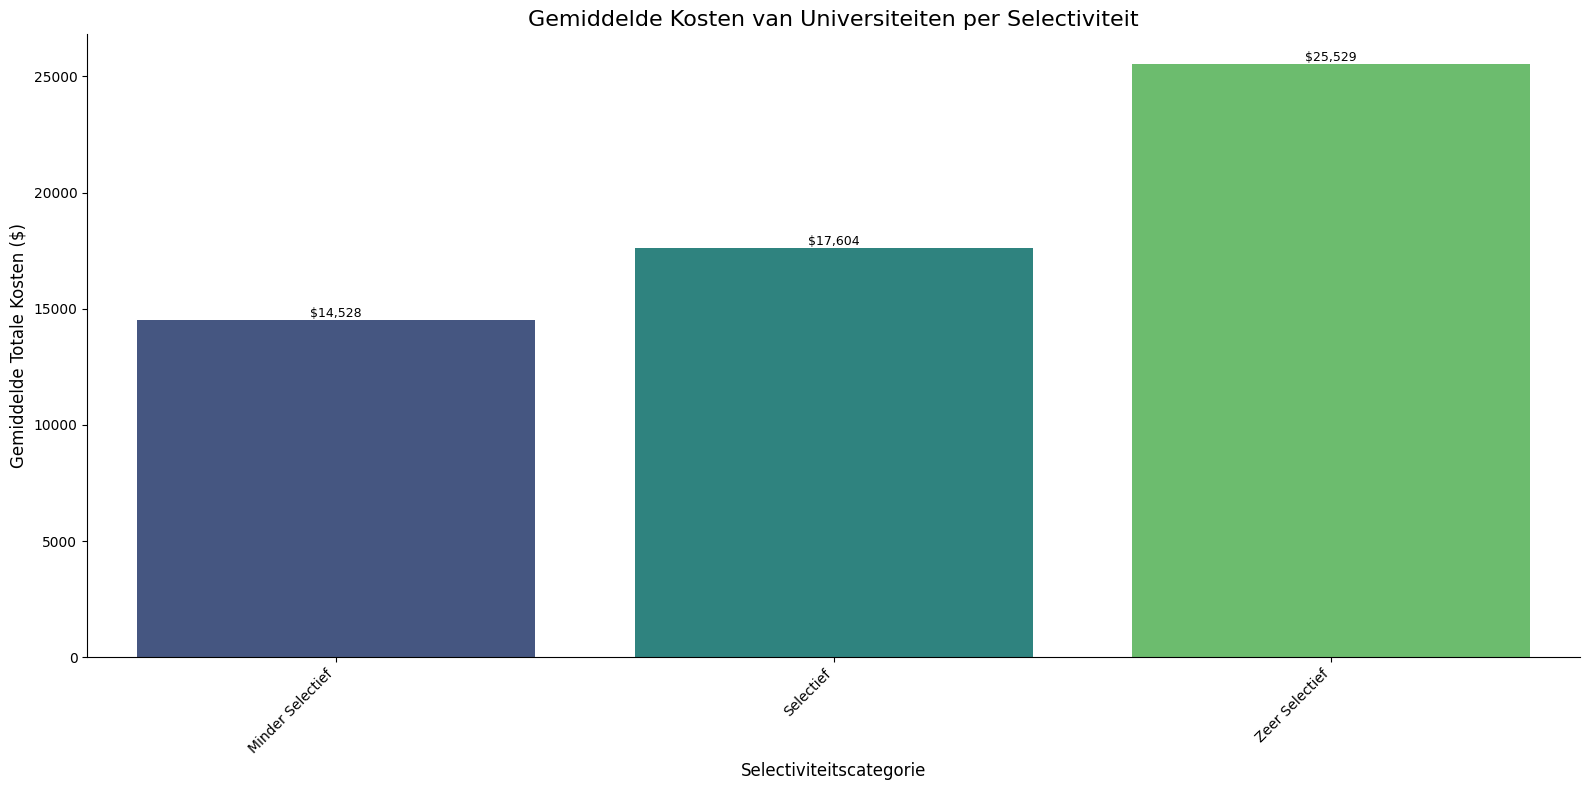

In [ ]:
#2b 7  Plot de gemiddelde kosten per categorie
# Stel de figure grootte in
plt.figure(figsize=(16, 8))
# Maak het barplot met extra aanpassingen
barplot = sns.barplot(
    x='Selectivity_Category',
    y='Total_Cost',
    data=mean_costs,
    palette='viridis',  # Gebruik het aangepaste palet
    hue='Selectivity_Category', # Wijs de categorieën toe aan hue
    legend=False # Verberg de legenda
)
# Voeg waarden toe boven elke bar
for bar in barplot.patches:
    # Bereken de hoogte van de bar
    bar_height = bar.get_height()
    # Formatteer de bar hoogte als een string met een dollar teken
    bar_height_text = f"${bar_height:,.0f}"
    # Bereken de X positie voor de tekst
    text_x_pos = bar.get_x() + bar.get_width() / 2
    # Bereken de Y positie voor de tekst, iets hoger dan de bar
    text_y_pos = bar_height
    # Voeg de tekst toe aan de plot
    barplot.text(
        text_x_pos,
        text_y_pos,
        bar_height_text,
        ha='center',  # Centreer horizontaal
        va='bottom',  # Plaats de tekst onderaan
        fontsize=9,    # Stel de lettergrootte in
        color='black'  # Stel de tekstkleur in
    )
# Verbeter de lay-out van de plot
plt.title('Gemiddelde Kosten van Universiteiten per Selectiviteit', fontsize=16)
plt.ylabel('Gemiddelde Totale Kosten ($)', fontsize=12)
plt.xlabel('Selectiviteitscategorie', fontsize=12)
plt.xticks(rotation=45, ha='right')
sns.despine(top=True, right=True)  # Verwijder de bovenste en rechter randen
plt.tight_layout()
# Toon de plot
plt.show()

In [41]:
#2b 8 Bereken de mediaan kosten per categorie
median_costs = df.groupby('Selectivity_Category')['Total_Cost'].median().reset_index()
# Print de mediaan kosten
print("Mediaan Kosten per Selectiviteitscategorie:")
print(median_costs)

Mediaan Kosten per Selectiviteitscategorie:
  Selectivity_Category  Total_Cost
0     Minder Selectief     14060.0
1            Selectief     18052.0
2       Zeer Selectief     25435.0


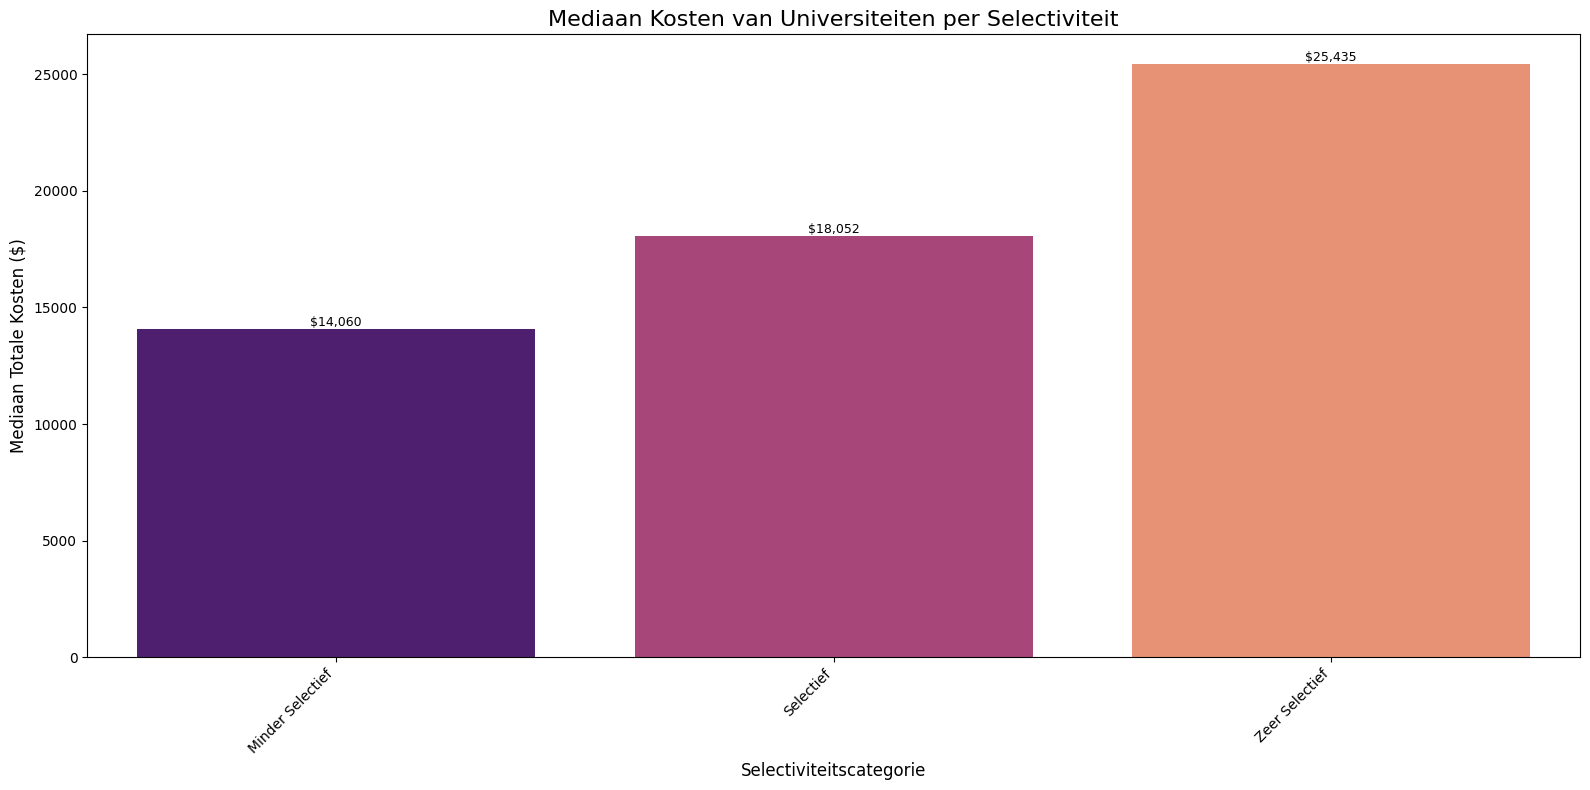

In [42]:
#2b 9 Plot de mediaan kosten per categorie
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    x='Selectivity_Category',
    y='Total_Cost',
    data=median_costs,
    palette='magma',
    hue='Selectivity_Category',  # Voeg hue toe
    legend=False  # Verberg de legenda
)
# Voeg waarden toe boven elke bar
for bar in barplot.patches:
    # Bereken de hoogte van de bar
    bar_height = bar.get_height()
    
    # Formatteer de bar hoogte als een string met een dollar teken
    bar_height_text = f"${bar_height:,.0f}"
    
    # Bereken de X positie voor de tekst
    text_x_pos = bar.get_x() + bar.get_width() / 2
    
    # Bereken de Y positie voor de tekst, iets hoger dan de bar
    text_y_pos = bar_height
    
    # Voeg de tekst toe aan de plot
    barplot.text(
        text_x_pos,
        text_y_pos,
        bar_height_text,
        ha='center',  # Centreer horizontaal
        va='bottom',  # Plaats de tekst onderaan
        fontsize=9,    # Stel de lettergrootte in
        color='black'  # Stel de tekstkleur in
    )
plt.title('Mediaan Kosten van Universiteiten per Selectiviteit', fontsize=16)
plt.ylabel('Mediaan Totale Kosten ($)', fontsize=12)
plt.xlabel('Selectiviteitscategorie', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Draai de x-as labels
plt.tight_layout()
plt.show()

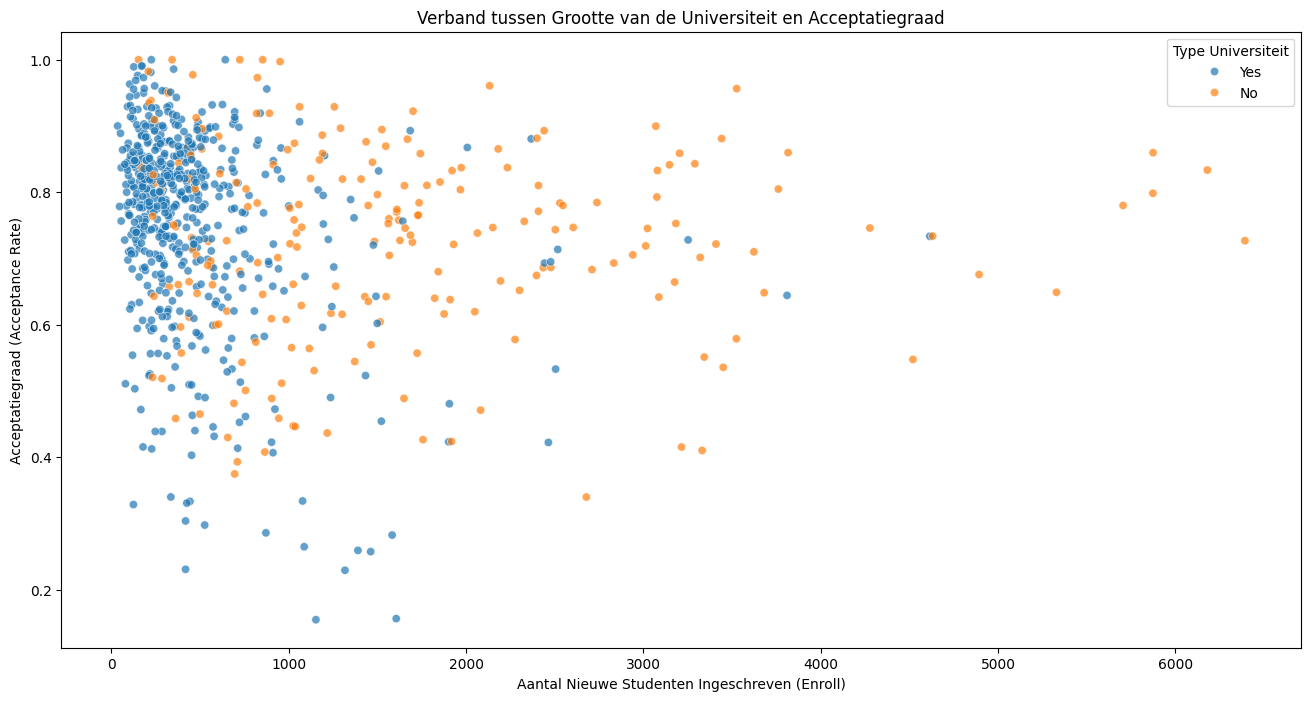


Conclusie:

De selectiviteit is bepaald op basis van de 'Acceptance_Rate', terwijl de totale kosten zijn berekend als de som van collegegeld voor buiten de staat ('Outstate') en kamer- en boardkosten ('Room_Board'). 
Uit de resultaten blijkt een algemene trend: de mediaan van de totale kosten is hoger voor 'Zeer Selectieve' universiteiten dan voor 'Minder Selectieve' universiteiten.
Zo bedragen de mediaan totale kosten voor 'Zeer Selectieve' universiteiten $25,435.00, terwijl deze voor 'Minder Selectieve' universiteiten $14,060.00 is.

Ondanks deze algemene trend zijn er uitzonderingen. Sommige minder selectieve universiteiten hebben hogere kosten dan bepaalde selectieve universiteiten. 
Dit duidt erop dat andere factoren, zoals locatie en type instelling, ook een rol spelen. 
Selectievere universiteiten kunnen hogere kosten vragen door hun reputatie, unieke programma’s en betere faciliteiten. 
Het onderzoeken van financiële steun en beurzen kan dit beeld veranderen. Ook andere variab

In [ ]:
#2c  Extra vraag: Is er een verband tussen de grootte van de universiteit en de acceptatiegraad?
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Enroll', y='Acceptance Rate', hue='Private', data=df, alpha=0.7)
plt.title('Verband tussen Grootte van de Universiteit en Acceptatiegraad')
plt.xlabel('Aantal Nieuwe Studenten Ingeschreven (Enroll)')
plt.ylabel('Acceptatiegraad (Acceptance Rate)')
plt.legend(title='Type Universiteit')
plt.show()
  
#conclusie:

conclusie = """
De selectiviteit is bepaald op basis van de 'Acceptance_Rate', terwijl de totale kosten zijn berekend als de som van collegegeld voor buiten de staat ('Outstate') en kamer- en boardkosten ('Room_Board'). 
Uit de resultaten blijkt een algemene trend: de mediaan van de totale kosten is hoger voor 'Zeer Selectieve' universiteiten dan voor 'Minder Selectieve' universiteiten.
"""
# Voeg specifieke data aan de conclusie toe
zeer_selectief_mediaan = median_costs[median_costs['Selectivity_Category'] == 'Zeer Selectief']['Total_Cost'].values[0]
minder_selectief_mediaan = median_costs[median_costs['Selectivity_Category'] == 'Minder Selectief']['Total_Cost'].values[0]
conclusie += f"Zo bedragen de mediaan totale kosten voor 'Zeer Selectieve' universiteiten ${zeer_selectief_mediaan:,.2f}, terwijl deze voor 'Minder Selectieve' universiteiten ${minder_selectief_mediaan:,.2f} is.\n"
conclusie += """
Ondanks deze algemene trend zijn er uitzonderingen. Sommige minder selectieve universiteiten hebben hogere kosten dan bepaalde selectieve universiteiten. 
Dit duidt erop dat andere factoren, zoals locatie en type instelling, ook een rol spelen. 
Selectievere universiteiten kunnen hogere kosten vragen door hun reputatie, unieke programma’s en betere faciliteiten. 
Het onderzoeken van financiële steun en beurzen kan dit beeld veranderen. Ook andere variabelen kunnen gebruikt worden om de selectiviteit mee te meten.
"""
print("\nConclusie:")
print(conclusie)

2. Voer beschrijvende statistiek uit door middel van het maken van een aantal grafieken. Creeer geschikte grafieken om de volgende vragen te beantwoorden:
- (c) Bedenk zelf een extra vraag en cre¨ eer een geschikte figuur om deze vraag meete beantwoorden.

Is er een relatie tussen de Student-Faculty Ratio (S_F_Ratio) en de Graduation Rate (Grad_Rate) van de universiteiten, en verschilt deze relatie tussen publieke en private universiteiten?

<Figure size 1200x800 with 0 Axes>

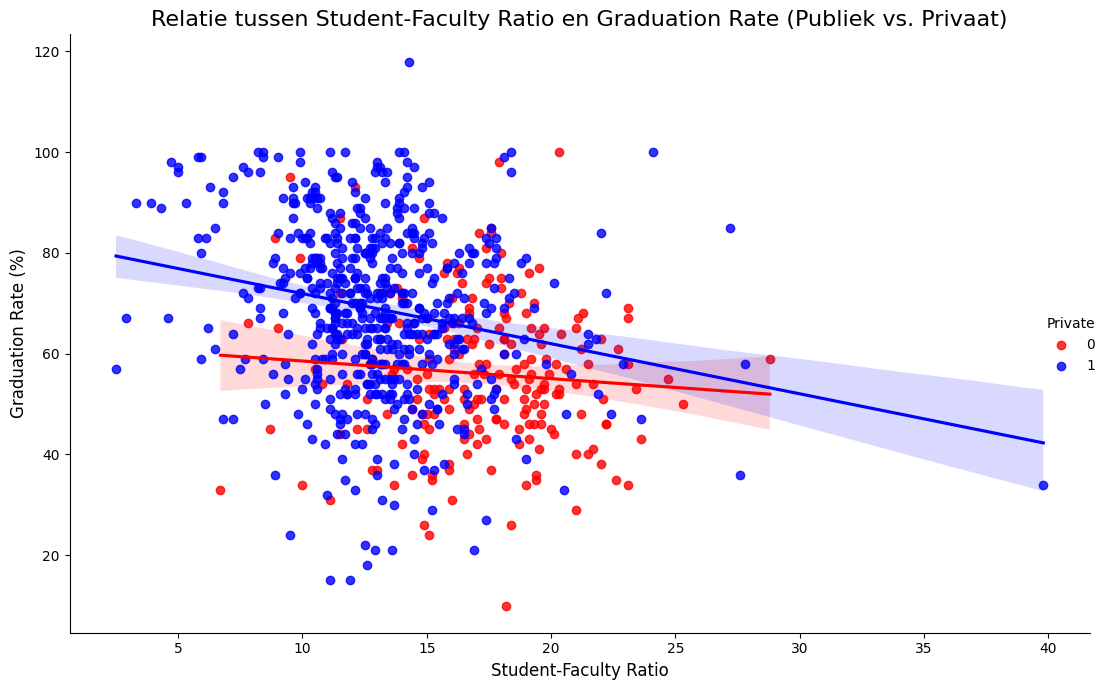


Conclusie:
Privé-universiteiten hebben significant hogere afstudeerpercentages en lagere student-faculteitsratios dan publieke universiteiten. 
De student-faculteitsratio heeft een zwak negatief effect op de afstudeercijfers, maar de privé/publieke status van een universiteit is een sterkere voorspeller 
van het afstudeerpercentage, waarschijnlijk door andere factoren zoals selectiviteit en financiële middelen.


In [5]:
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]
# Verwerk ontbrekende waarden in numerieke kolommen met het gemiddelde
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())  # Correcte manier om fillna te gebruiken
# Zet 'Private' om naar numeriek (0=Nee, 1=Ja)
df['Private'] = df['Private'].map({'No': 0, 'Yes': 1}).fillna(0)
#private_0 = df[df['Private'] == 0].head(10)
#private_1 = df[df['Private'] == 1].head(10)
#print(private_0)
#print(private_1)    
# Scatter plot maken met regressielijnen
plt.figure(figsize=(12, 8))
sns.lmplot(x='S_F_Ratio', y='Grad_Rate', hue='Private', data=df, palette=['red','blue'], height=7, aspect=1.5)
plt.title('Relatie tussen Student-Faculty Ratio en Graduation Rate (Publiek vs. Privaat)', fontsize=16)
plt.ylabel('Graduation Rate (%)', fontsize=12)
plt.xlabel('Student-Faculty Ratio', fontsize=12)
plt.tight_layout()
plt.show()

conclusie = """Privé-universiteiten hebben significant hogere afstudeerpercentages en lagere student-faculteitsratios dan publieke universiteiten. 
De student-faculteitsratio heeft een zwak negatief effect op de afstudeercijfers, maar de privé/publieke status van een universiteit is een sterkere voorspeller 
van het afstudeerpercentage, waarschijnlijk door andere factoren zoals selectiviteit en financiële middelen."""

print("\nConclusie:")
print(conclusie)


# 3. Onderzoek de verdeling van de “room and board costs”. Vergelijk hierbij de fit van de
normale en de log-normale verdeling met behulp van een numeriek criterium. Bekijk,voor de beste verdeling, vervolgens de fit in absolute zin met behulp van plots. 
Past de gevonden verdeling goed bij de data? Motiveer waarom wel/niet.

In [7]:
# 3. vooorbereiding op inferentiële statistiek
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

# Verwerk ontbrekende waarden in numerieke kolommen met het gemiddelde
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    # Maak een kopie van de kolom om chaining te vermijden
    df[col] = df[col].copy()
    df[col] = df[col].fillna(df[col].mean())



In [14]:
# --- Analyse van Room_Board ---
room_board = df['Room_Board']
# 1. Numerieke Criterium (AIC)
# Definieer functie om AIC te berekenen
def calculate_aic(log_likelihood, num_parameters):
    aic = 2 * num_parameters - 2 * log_likelihood
    return aic
# Normale verdeling
mu, std = stats.norm.fit(room_board)
log_likelihood_normal = np.sum(stats.norm.logpdf(room_board, mu, std))
aic_normal = calculate_aic(log_likelihood_normal, 2) # 2 parameters: mu en std

# Log-normale verdeling
shape, loc, scale = stats.lognorm.fit(room_board)
log_likelihood_lognorm = np.sum(stats.lognorm.logpdf(room_board, shape, loc, scale))
aic_lognorm = calculate_aic(log_likelihood_lognorm, 3) # 3 parameters: shape, loc, scale
print(f"AIC Normal: {aic_normal}")
print(f"AIC Log-Normal: {aic_lognorm}")
if aic_normal > aic_lognorm:
        print(f"De AIC geeft aan dat de normale verdeling beter past. (AIC normal: {aic_normal})")
else:   print(f"De AIC geeft aan dat de log-normale verdeling beter past. (AIC log-normal: {aic_lognorm})")


AIC Normal: 13086.119473449222
AIC Log-Normal: 13048.702583327864
De AIC geeft aan dat de normale verdeling beter past. (AIC normal: 13086.119473449222)


Deze code vergelijkt hoe goed een normale en een log-normale verdeling passen bij de "Room_Board" (kost en inwoning) data. Het gebruikt de AIC (Akaike Information Criterion) 
om te bepalen welke verdeling de betere fit geeft: een lagere AIC betekent een betere fit

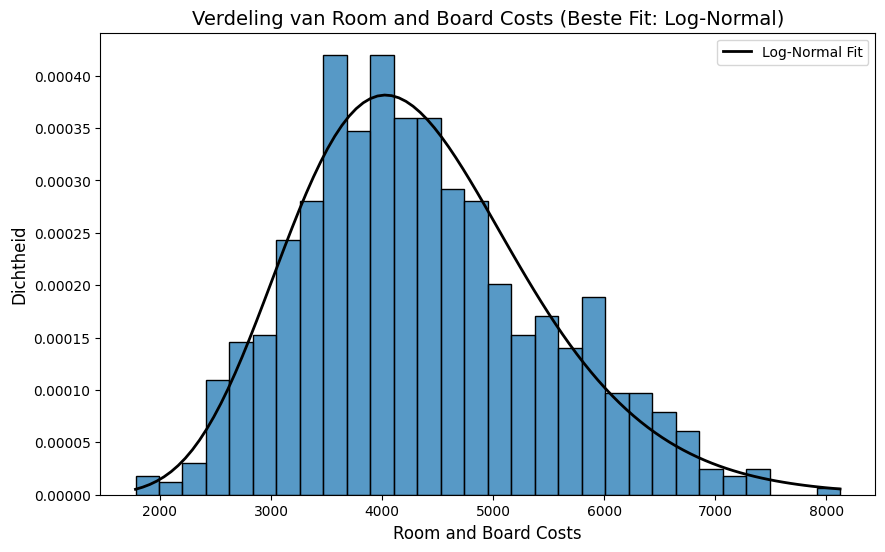

In [85]:
# 2. Visuele Inspectie (Plots)
# Histogram met de beste fit
plt.figure(figsize=(10, 6))
sns.histplot(room_board, kde=False, stat="density", bins=30) # bins voor meer detail
plt.title(f'Verdeling van Room and Board Costs (Beste Fit: {best_dist})', fontsize=14)
plt.xlabel('Room and Board Costs', fontsize=12)
plt.ylabel('Dichtheid', fontsize=12)


# Plot de beste fit verdeling
x = np.linspace(room_board.min(), room_board.max(), 100)
if best_dist == "Normal":
    p = stats.norm.pdf(x, mu, std)
else:
    p = stats.lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2, label=f'{best_dist} Fit')
plt.legend()
plt.show()

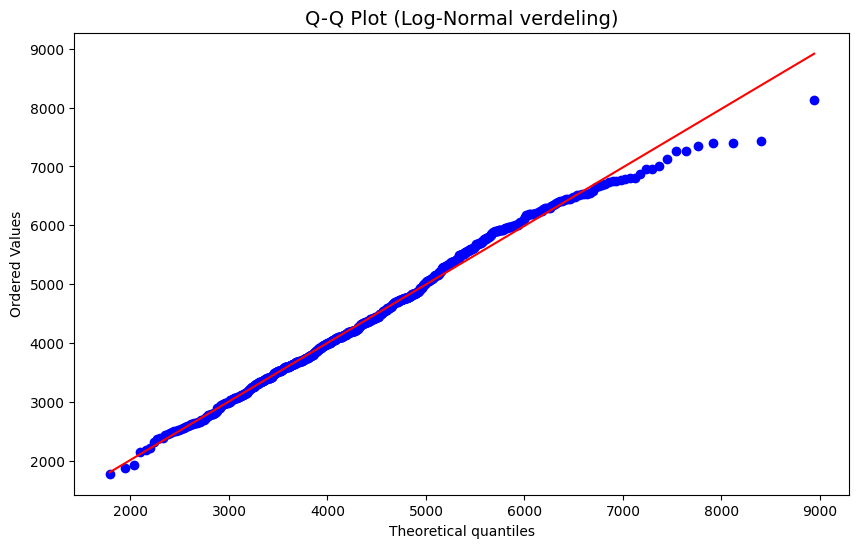

De Log-Normal verdeling past beter bij de 'Room and Board Costs' data op basis van zowel het AIC criterium als de visuele inspectie via histogram en Q-Q plot.


In [ ]:
# Q-Q plot voor de beste fit
plt.figure(figsize=(10, 6))
if best_dist == "Normal":
    stats.probplot(room_board, dist="norm", sparams=(mu, std), plot=plt)
else:
    stats.probplot(room_board, dist=stats.lognorm(shape, loc, scale), plot=plt)
plt.title(f'Q-Q Plot ({best_dist} verdeling)', fontsize=14)
plt.show()
# Samenvatting
print(f"De {best_dist} verdeling past beter bij de 'Room and Board Costs' data op basis van zowel het AIC criterium als de visuele inspectie via histogram en Q-Q plot.")


# 4. 
Voer hypothesetoetsen uit om de volgende vragen te beantwoorden. Geef telkens
duidelijk aan wat de exacte nul- en alternatieve hypothese is die je toetst, motiveer
de keuze van de specifieke toets en verwoord duidelijk de conclusie.
- (a) Ontvangen elite scholen een ander aantal aanmeldingen in vergelijking met niet-elite scholen? Definieer “elite-school” als scholen waarvoor geldt dat meer dan 50% van de studenten tot de top 10% van hun high school behoort.
- (b) Is er een verband tussen acceptance rate en graduation rate?
- (c) Bedenk zelf ook een extra hypothese om te toetsen en voer de hypothesetoets
uit.


# 4 (a) 

1. Hypothesen:
- Nulhypothese (H0): Er is geen significant verschil in het gemiddelde aantal aanmeldingen tussen elite en niet-elite scholen.  (μelite = μniet_elite)
- Alternatieve hypothese (H1): Er is een significant verschil in het gemiddelde aantal aanmeldingen tussen elite en niet-elite scholen. (μelite ≠ μniet_elite)

2. Keuze van de Toets: Independent Samples t-test (Two-Sample t-test)

Waarom: 
- We vergelijken de gemiddelden van twee onafhankelijke groepen (elite scholen vs. niet-elite scholen). De data is numeriek (aantal aanmeldingen), en we willen weten of de gemiddelden van de twee groepen significant verschillen.  
- De t-test is geschikt als we geen sterke reden hebben om aan te nemen dat de varianties van de twee groepen gelijk zijn (in dat geval zouden we een Welch's t-test gebruiken, maar we gaan eerst Levene's test doen om te zien of deze varianties gelijk zijn).

aanname:
- Onafhankelijkheid: De aanmeldingen van de ene school hebben geen invloed op de aanmeldingen bij een andere school.
- Normaliteit: De aanmeldingen in elke groep (elite en niet-elite) zijn ongeveer normaal verdeeld.  Dit is belangrijk, vooral bij kleine steekproeven. We kunnen dit visueel controleren (histogram/QQ-plot) of met een Shapiro-Wilk test (formeler, maar gevoelig voor grote steekproeven).
- Gelijkheid van varianties (Homoscedasticiteit):  De varianties van het aantal aanmeldingen in de twee groepen zijn gelijk.  We kunnen Levene's test gebruiken om dit te controleren.


In [17]:
# Data laden en voorbereiden
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]
# Kopieer dataframe
df_copy = df.copy()
# Verwerk ontbrekende waarden (fillna):
numeric_columns = df_copy.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
# Elite school definitie
df_copy['Elite'] = df_copy['Top10perc'] > 50  # True als meer dan 50% in top 10% zit
# Aantal aanmeldingen
aantal_aanmeldingen = 'Apps'
# Check voor voldoende data
elite_aanmeldingen = df_copy[df_copy['Elite'] == True][aantal_aanmeldingen]
niet_elite_aanmeldingen = df_copy[df_copy['Elite'] == False][aantal_aanmeldingen]
if len(elite_aanmeldingen) < 2 or len(niet_elite_aanmeldingen) < 2:
    print("Onvoldoende data voor t-test. Controleer de Elite school definitie.")
    exit()
# 1. Test op Gelijke Varianties (Levene's Test)
levene_stat, levene_p = stats.levene(elite_aanmeldingen, niet_elite_aanmeldingen)
print(f"Levene's Test: statistic={levene_stat:.3f}, p={levene_p:.3f}")
# 2. T-Test (met of zonder gelijke varianties)
if levene_p > 0.05:
    # Gelijke varianties aannemen
    t_stat, p_value = stats.ttest_ind(elite_aanmeldingen, niet_elite_aanmeldingen, equal_var=True)
    df_welch = None  # Geen vrijheidsgraden van Welch nodig als equal_var=True
    print("T-test (gelijke varianties aangenomen):")
else:
    # Gelijke varianties niet aannemen (Welch's T-test)
    t_stat, p_value = stats.ttest_ind(elite_aanmeldingen, niet_elite_aanmeldingen, equal_var=False)
    resultaat = stats.ttest_ind(elite_aanmeldingen, niet_elite_aanmeldingen, equal_var=False) # sla de resultaten op in resultaat
    df_welch = resultaat.df  # gebruik resultaat.df om de vrijheidsgraden te verkrijgen
    print("Welch's T-test (ongelijke varianties aangenomen):")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if df_welch is not None:  # print statement toont enkel een waarde indien van toepassing
    print(f"Vrijheidsgraden (Welch's): {df_welch:.2f}")
# Significantie niveau (alpha)
alpha = 0.05
# Conclusie
if p_value < alpha:
    print("Conclusie: We verwerpen de nulhypothese. Er is een significant verschil in het aantal aanmeldingen tussen elite en niet-elite scholen.")
else:
    print("Conclusie: We verwerpen de nulhypothese niet. Er is geen significant bewijs voor een verschil in het aantal aanmeldingen tussen elite en niet-elite scholen.")

Levene's Test: statistic=25.731, p=0.000
Welch's T-test (ongelijke varianties aangenomen):
T-statistic: 5.662
P-value: 0.000
Vrijheidsgraden (Welch's): 85.90
Conclusie: We verwerpen de nulhypothese. Er is een significant verschil in het aantal aanmeldingen tussen elite en niet-elite scholen.


# 4 (b) 
1. Hypothesen:

- Nulhypothese (H0): Er is geen correlatie (lineair verband) tussen de acceptance rate en de graduation rate. (ρ = 0)
- Alternatieve hypothese (H1): Er is een correlatie (lineair verband) tussen de acceptance rate en de graduation rate. (ρ ≠ 0)

2. Keuze van de Toets: Pearson's Correlatietest

Waarom: 
- We willen onderzoeken of er een lineair verband is tussen twee numerieke variabelen (acceptance rate en graduation rate). 
- Pearson's correlatie meet de sterkte en richting van zo'n lineair verband.

aanname:
- Numerieke data: Beide variabelen moeten numeriek zijn.
- Lineariteit: Er wordt aangenomen dat er een lineair verband is tussen de variabelen. Dit kan visueel worden gecontroleerd met een scatterplot.
- Normaliteit: Beide variabelen zijn ongeveer normaal verdeeld. Dit is minder cruciaal bij grotere steekproeven, maar belangrijk om te overwegen.
- Onafhankelijkheid: De observaties (scholen) zijn onafhankelijk van elkaar.

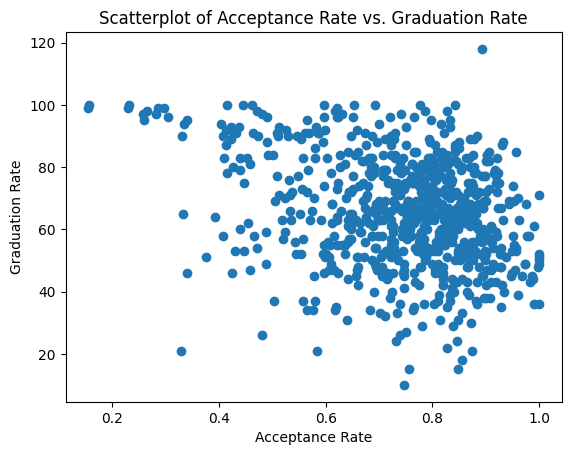

Pearson's correlatiecoëfficiënt: -0.287
P-value: 0.000
Conclusie: We verwerpen de nulhypothese. Er is een significant verband tussen acceptance rate en graduation rate.


In [18]:
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]
# Verwerk ontbrekende waarden (fillna): Maak een kopie van elke kolom
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
# Bereken de acceptance rate
df['Acceptance_Rate'] = df['Accept'] / df['Apps']
# Controleer op NaN waarden in de Acceptance_Rate kolom
if df['Acceptance_Rate'].isnull().any():
    print("Er zijn NaN waarden in de Acceptance_Rate kolom. Rijen met NaN worden verwijderd.")
    df = df.dropna(subset=['Acceptance_Rate'])
# Definieer variabelen
acceptance_rate = df['Acceptance_Rate']
graduation_rate = df['Grad_Rate']
# Scatterplot om lineariteit te checken (optioneel, maar aanbevolen)
plt.scatter(acceptance_rate, graduation_rate)
plt.xlabel('Acceptance Rate')
plt.ylabel('Graduation Rate')
plt.title('Scatterplot of Acceptance Rate vs. Graduation Rate')
plt.show()
# Pearson's correlatietest
correlation, p_value = stats.pearsonr(acceptance_rate, graduation_rate)
print(f"Pearson's correlatiecoëfficiënt: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")
# Significantieniveau (alpha)
alpha = 0.05
# Conclusie
if p_value < alpha:
    print("Conclusie: We verwerpen de nulhypothese. Er is een significant verband tussen acceptance rate en graduation rate.")
else:
    print("Conclusie: We verwerpen de nulhypothese niet. Er is geen significant bewijs voor een verband tussen acceptance rate en graduation rate.")

# 4 (c) 

1. Hypothese:

Is er een significant verschil in het gemiddelde Outstate collegegeld tussen scholen met een hoge en lage Grad_Rate? (Definieer "hoog" als een afstudeerpercentage boven het gemiddelde)

In [19]:
df = pd.read_csv(DATA_PATH, sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]
# Verwerk ontbrekende waarden in numerieke kolommen met het gemiddelde
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
# Bepaal het gemiddelde afstudeerpercentage
gemiddelde_afstudeerpercentage = df['Grad_Rate'].mean()
# Creëer een nieuwe kolom 'Hoog_Afstudeerpercentage'
df['Hoog_Afstudeerpercentage'] = df['Grad_Rate'] > gemiddelde_afstudeerpercentage
# Definieer de groepen
hoge_afstudeerpercentage_scholen = df[df['Hoog_Afstudeerpercentage'] == True]['Outstate']
lage_afstudeerpercentage_scholen = df[df['Hoog_Afstudeerpercentage'] == False]['Outstate']
# Controleer dat er voldoende data is in elke groep
if len(hoge_afstudeerpercentage_scholen) < 2 or len(lage_afstudeerpercentage_scholen) < 2:
    print("Onvoldoende data in een van de groepen.  Kan de t-test niet uitvoeren.")
    exit()
# 1. Levene's Test voor Gelijke Varianties
levene_stat, levene_p = stats.levene(hoge_afstudeerpercentage_scholen, lage_afstudeerpercentage_scholen)
print(f"Levene's Test: statistic={levene_stat:.3f}, p={levene_p:.3f}")
# 2. T-Test (Welch's t-test bij ongelijke varianties)
if levene_p > 0.05:
    # Gelijke varianties aannemen
    t_stat, p_value = stats.ttest_ind(hoge_afstudeerpercentage_scholen, lage_afstudeerpercentage_scholen, equal_var=True)
    print("T-test (gelijke varianties aangenomen):")
else:
    # Ongelijke varianties aannemen (Welch's t-test)
    t_stat, p_value = stats.ttest_ind(hoge_afstudeerpercentage_scholen, lage_afstudeerpercentage_scholen, equal_var=False)
    print("Welch's T-test (ongelijke varianties aangenomen):")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


# Significantieniveau (alpha)
alpha = 0.05


# Conclusie
if p_value < alpha:
    print("Conclusie: We verwerpen de nulhypothese. Er is een significant verschil in het gemiddelde collegegeld tussen scholen met een hoog en laag afstudeerpercentage.")
else:
    print("Conclusie: We verwerpen de nulhypothese niet. Er is geen significant bewijs voor een verschil in het gemiddelde collegegeld tussen scholen met een hoog en laag afstudeerpercentage.")


    #We verwerpen de nulhypothese. Er is een significant verschil in het gemiddelde collegegeld (Outstate) tussen scholen met een hoog afstudeerpercentage en scholen met een laag afstudeerpercentage (Welch's t = 17.315, p < 0.001).
    #• Levene's Test: De p-waarde van Levene's test is 0.000 (p < 0.001), wat kleiner is dan ons significantieniveau van 0.05. 
    # Dit betekent dat er een significant verschil is in de varianties van de twee groepen (hoge en lage afstudeerpercentages). 
    # Daarom hebben we terecht Welch's t-test gebruikt.
    # • Welch's T-test: De p-waarde van Welch's t-test is ook 0.000 (p < 0.001), wat veel kleiner is dan ons significantieniveau van 0.05.  
    # Dit betekent dat er een significant verschil is in de gemiddelde collegegelden tussen de twee groepen.
    # • Verwerpen van de nulhypothese: Omdat de p-waarde van Welch's t-test kleiner is dan alpha, verwerpen we de nulhypothese.
    # • Praktische interpretatie: We hebben statistisch bewijs dat scholen met een hoog afstudeerpercentage significant andere collegegelden hebben dan scholen met een laag afstudeerpercentage. 
    # Op basis van de t-statistiek (die positief is), vermoeden we dat scholen met een hogere afstudeersnelheid een hoger collegegeld hebben.


Levene's Test: statistic=28.707, p=0.000
Welch's T-test (ongelijke varianties aangenomen):
T-statistic: 17.315
P-value: 0.000
Conclusie: We verwerpen de nulhypothese. Er is een significant verschil in het gemiddelde collegegeld tussen scholen met een hoog en laag afstudeerpercentage.
